In [9]:
import cv2
import os
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Reshape, Conv2D, MaxPooling2D, Resizing, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_path = 'person_images_train'
test_path = 'person_images_test'

image_paths_train = [os.path.join(train_path, file) for file in os.listdir(train_path) if file.endswith(('.jpg', '.png'))]
train_data_images = [cv2.imread(img_path) for img_path in image_paths_train]

image_paths_test = [os.path.join(test_path, file) for file in os.listdir(test_path) if file.endswith(('.jpg', '.png'))]
test_data_images = [cv2.imread(img_path) for img_path in image_paths_test]

num_images_to_display = 5

print('Train Images')
for i in range(min(num_images_to_display, len(train_data_images))):
    plt.figure()
    plt.imshow(train_data_images[i])
    plt.axis('off')
    plt.show()
print('*'* 20)

print('Test Images')
for i in range(min(num_images_to_display, len(test_data_images))):
    plt.figure()
    plt.imshow(test_data_images[i])
    plt.axis('off')
    plt.show()

print(f"Number of Train Images: {len(train_data_images)}, Number of Test Images: {len(test_data_images)}")

Train Images


********************
Test Images


Number of Train Images: 42550, Number of Test Images: 1150


In [3]:
y_train = pd.read_csv('Data/y_train.csv')
y_test = pd.read_csv('Data/y_test.csv')

y_train.shape, y_test.shape

((42550, 1), (1150, 1))

In [4]:
x_train = np.array(train_data_images) / 255.0
x_test = np.array(test_data_images) / 255.0

y_train = np.array(y_train)
y_test = np.array(y_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((42550, 1, 178, 3), (42550, 1), (1150, 1, 178, 3), (1150, 1))

In [12]:
model = Sequential()

new_image_height = 64
new_image_width = 64

model.add(Resizing(new_image_height, new_image_width, input_shape=(1, 177, 3)))

model.add(Conv2D(32, kernel_size=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(64, kernel_size=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Conv2D(128, kernel_size=(1, 1), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(1, 1)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


/Users/abdelrahman/miniconda3/envs/work/lib/python3.9/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
        datagen.flow(x_train, y_train, batch_size=23),
        epochs=50,
        validation_data=[x_test, y_test],
        callbacks=[early_stopping])


Epoch 1/50
 136/1850 ━━━━━━━━━━━━━━━━━━━━ 10:57 384ms/step - accuracy: 0.4972 - loss: 1.6700

KeyboardInterrupt: 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc}")

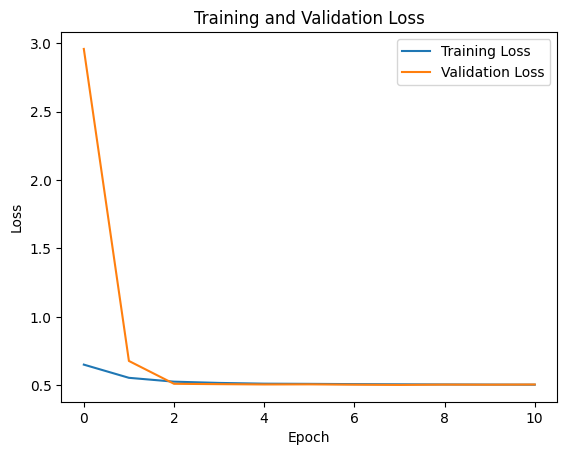

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

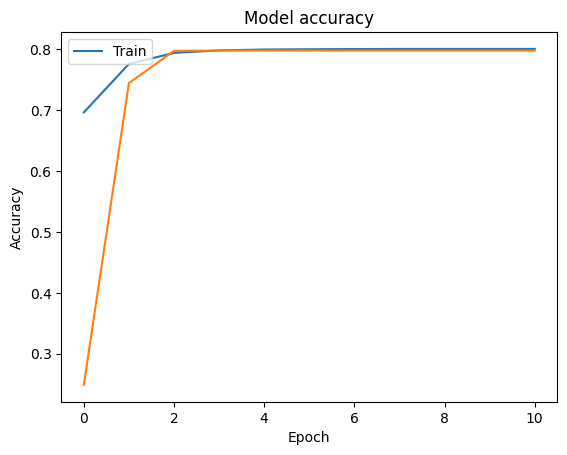

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()